## GSE196728 - The human blood transcriptome exhibits time-of-day-dependent response to hypoxia: Lessons from the highest city in the world

- Sadly the dataset isn't complete. There are missing some altitude values.
- https://pubmed.ncbi.nlm.nih.gov/35977481/

In [6]:
import COFE.analyse
import COFE.scpca
import COFE.plot
import numpy as np
import anndata as ad
import pandas as pd
import PCA_func as pc
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.preprocessing import normalize

### Step 1: Open the dataset

In [7]:
path = '/Users/maksimsgolubovics/Python_VScode/Studienprojekt/rnaseq_datasets/GSE196728_rnaseq.h5ad'
adata = ad.read_h5ad(path)

#Transform to DataFrame
data_df = pd.DataFrame(data=normalize(adata.X, axis=0)*1000000, columns=adata.var.index, index=adata.obs.index).T

#Look at sampeles features
adata.var[['altitude', 'subject', 'time']]
adata.var['altitude'].unique()

data_df

GeneID,100287102,653635,102466751,107985730,100302278,645520,79501,100996442,729737,102725121,...,4538,4564,4575,4568,4540,4541,4556,4519,4576,4571
GSM5899659,10.785884,34.668911,0.0,0.000000,0.0,0.000000,0.0,3.466891,523.500561,2.311261,...,1622.119840,3.466891,1.540841,0.385210,321.265245,528.893503,176.426238,1251.932909,2.696471,1.155630
GSM5899660,13.092746,34.477565,0.0,0.000000,0.0,0.000000,0.0,0.872850,360.050517,7.419223,...,1013.814971,0.872850,0.000000,0.000000,296.332486,542.912537,178.934196,678.640672,2.618549,4.364249
GSM5899661,8.381745,56.576778,0.0,0.419087,0.0,0.000000,0.0,2.514523,322.697176,1.257262,...,849.489837,0.419087,0.000000,0.838174,249.356908,474.406757,188.170171,545.232501,1.676349,3.352698
GSM5899665,10.846527,38.065169,0.0,0.000000,0.0,0.204651,0.0,2.251166,311.684154,3.888378,...,3968.191565,4.911635,1.227909,1.637212,570.568235,1055.796817,322.530681,2722.478205,3.683726,7.162801
GSM5899666,4.766788,19.933842,0.0,0.000000,0.0,0.000000,0.0,1.950050,303.991088,1.083361,...,320.674847,0.216672,0.216672,0.433344,87.102222,119.603051,46.367850,235.306003,0.433344,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5899750,3.968716,13.368307,0.0,0.000000,0.0,0.000000,0.0,0.417760,50.340030,2.088798,...,665.699896,1.253279,0.000000,1.253279,141.202739,244.389356,92.742627,478.543603,0.626639,0.417760
GSM5899751,9.326704,61.089909,0.0,0.000000,0.0,0.000000,0.0,1.399006,623.956475,1.399006,...,1053.451178,0.932670,0.466335,0.932670,298.920852,853.393385,348.818717,893.031875,1.865341,6.995028
GSM5899752,4.046299,29.672858,0.0,0.000000,0.0,0.000000,0.0,2.697533,294.480640,0.449589,...,1057.882361,0.000000,0.000000,0.449589,277.396267,600.650588,205.462065,702.257649,0.899178,3.147121
GSM5899758,2.152782,9.349225,0.0,0.000000,0.0,0.000000,0.0,0.246032,56.464399,0.861113,...,457.989013,0.861113,0.123016,0.184524,82.236276,127.383192,40.595319,268.113633,0.123016,0.246032


The data do not appear to be complete. There should be 144 samples.

### Step 2: Prepare the dataset

In [8]:
data_df_log = np.log10(data_df + 0.1) #Logarithmic transformation

### Step 3: Exploratory analysis

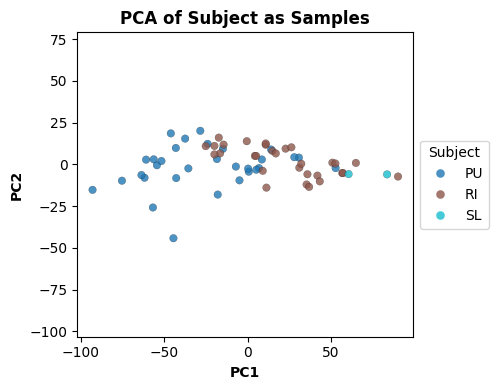

In [9]:
data_df_log_time = data_df_log.join(adata.var['altitude']).reset_index().set_index('altitude').drop('index', axis=1)
pc.principal_component_2d_timesample(data=data_df_log_time, label='Subject', c_map='tab10')

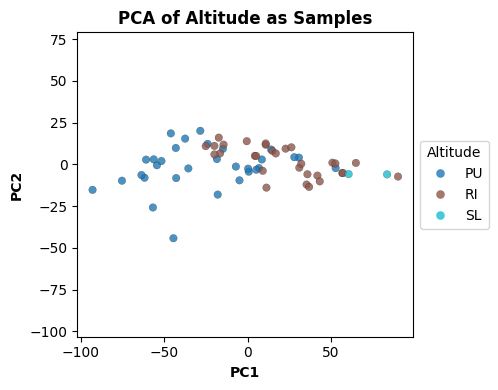

In [10]:
data_df_log_time = data_df_log.join(adata.var['altitude']).reset_index().set_index('altitude').drop('index', axis=1)
pc.principal_component_2d_timesample(data=data_df_log_time, label='Altitude', c_map='tab10')

### Step 5: Identify mean and std threshold values

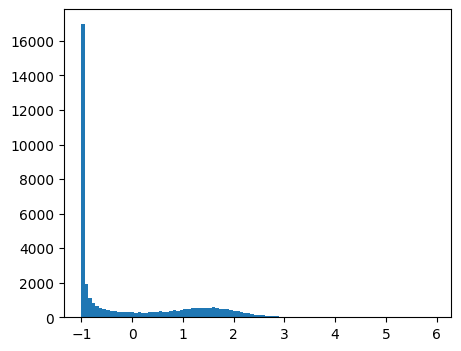

In [11]:
plt.figure(figsize=(5, 4))
plt.hist(x=data_df_log.mean(), bins=100);

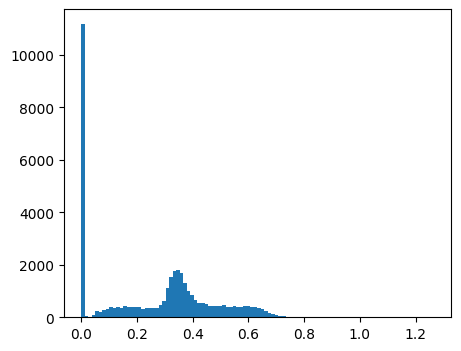

In [12]:
plt.figure(figsize=(5, 4))
plt.hist(x=data_df_log.std(), bins=100);

### Step 5: COFE

### Puno Peru

In [21]:
X_train_a = data_df_log[adata.var['altitude'] == 'PU']
true_time_train_a = adata.var[adata.var['altitude'] == 'PU']['time'].astype(int)

X_train_a, X_test_a, features_a, features_std_a = COFE.analyse.preprocess_data(X_train_a.to_numpy(), None, 
                                                                           features=X_train_a.columns, feature_dim='col', 
                                                                           mean_threshold= 1,scaling_threshold=3.5)
X_train_a.shape # (Samples, Transcripts)

(31, 5681)

In [22]:
s_choices = np.linspace(1, 50, 15)
cv_a = COFE.analyse.cross_validate(X_train_a, s_choices, features=features_a, K=5, ncores=-1, restarts=10)

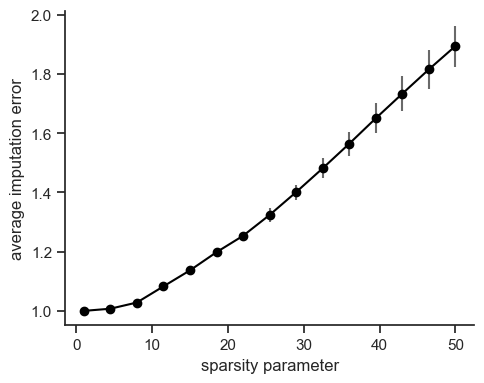

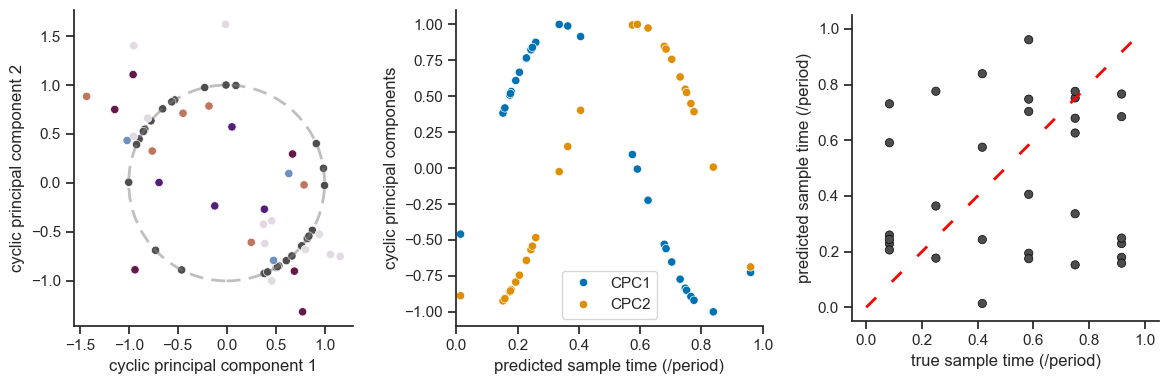

In [23]:
results_train_diet_a = COFE.analyse.predict_time(X_train_a, cv_a, true_times=true_time_train_a.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_a, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_a, time=true_time_train_a.to_numpy(), X=X_train_a, figsize=(12, 4), period=24)

In [24]:
results_train_diet_a["MAPE"]*24

np.float64(4.258716079341785)

### La Rinconada Peru

In [25]:
X_train_b = data_df_log[adata.var['altitude'] == 'RI']
true_time_train_b = adata.var[adata.var['altitude'] == 'RI']['time'].astype(int)

X_train_b, X_test_b, features_b, features_std_b = COFE.analyse.preprocess_data(X_train_b.to_numpy(), None, 
                                                                           features=X_train_b.columns, feature_dim='col', 
                                                                           mean_threshold= 1,scaling_threshold=4)
X_train_b.shape # (Samples, Transcripts)

(30, 4348)

In [26]:
s_choices = np.linspace(1, 50, 15)
cv_b = COFE.analyse.cross_validate(X_train_b, s_choices, features=features_b, K=5, ncores=-1, restarts=10)

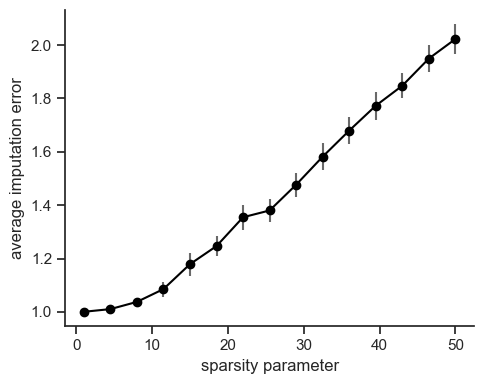

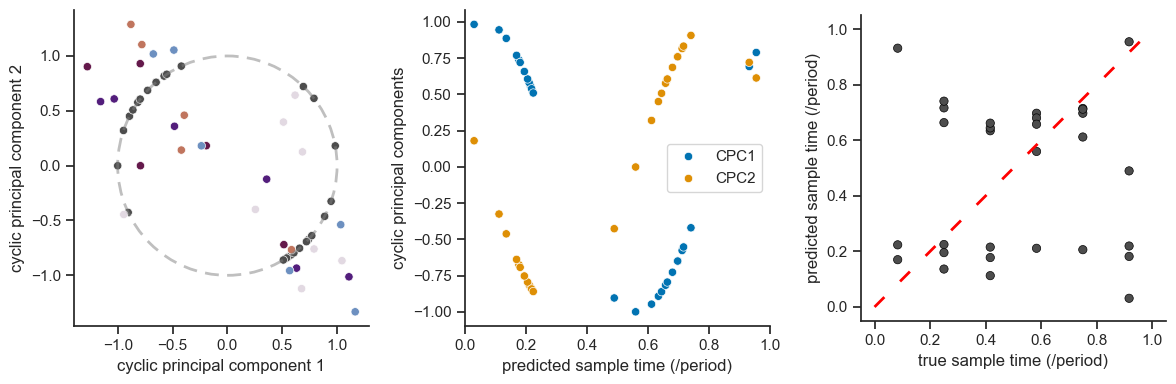

In [27]:
results_train_diet_b = COFE.analyse.predict_time(X_train_b, cv_b, true_times=true_time_train_b.to_numpy(), period=24)
COFE.plot.plot_cv_run(results_train_diet_b, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_diet_b, time=true_time_train_b.to_numpy(), X=X_train_b, figsize=(12, 4), period=24)

In [28]:
results_train_diet_b["MAPE"]*24

np.float64(3.502117183548805)

## Conclusion

So this study confuses me quite a bit because the thing is that blood cells have no nucleus, so the idea for the researchers was to look at everything possible in whole-blood mixture, and looking at PCA there are some differences between seq composition based on altitude. But for doing COFE, which is very sensitive to tissue type, that's obviously a no-go. So in this case, the poor COFE performance is not surprising.